# Linear Regression 

Implemented a linear regression using the least squares method. First, we will see the results of predicting a value equal to the average expected value. Then, we will fit a linear model to our data sets and compare the results between our first method and the latter one.

In [1]:
import _pickle as cp
import numpy as np
import matplotlib.pyplot as plt

#Load the input data in X and the expected output in y
X, y = cp.load(open('winequality-white.pickle', 'rb'))

#Store the shape of the input data - N=number samples, D=number features
N, D = X.shape

##### Split the data into training data and test data. We will use 80% of our samples to train our model while the rest will be used to test the accuracy of our model.

In [2]:
N_train = int(0.8 * N)
N_test = N - N_train

print ("We will use " + str(N_train) + " samples to train the model and " + str(N_test) + " to test the model.")

X_train = X[:N_train]
X_test = X[N_train:]

Y_train = y[:N_train]
Y_test = y[N_train:]

##### Make a bar chart showing the distribution of y values in the training set

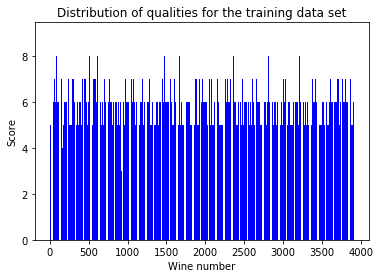

In [3]:
plt.bar(np.arange(N_train), Y_train, color = "blue")
plt.ylabel('Score')
plt.xlabel('Wine number')
plt.title('Distribution of qualities for the training data set')
plt.show()

##### Calculate the average y from our training data

In [4]:
average_yTrain = np.average(Y_train)
print ("We have an prediction score of " + str(average_yTrain.round(3)) + " for our model obtained by averaging all the y values in the train data.")


We have an prediction score of 5.879 for our model obtained by averaging all the y values in the train data.


##### Calculate the mean squared error

In [5]:
#Set the mean squared error to 0
meanSquaredError = 0.0

#For each sample in the test data set calculate the mean squared error
for indexSample in range(0,N_test - 1):
    meanSquaredError = meanSquaredError + (average_yTrain - Y_test[indexSample])**2
meanSquaredError = meanSquaredError / N
print("We have a mean squared error of " + str(meanSquaredError.round(3)))

We have a mean squared error of 0.163


##### Standardize the data
Standardize both the test and train data set in order to be able to compare features that have different units/scale.
Standardizing our data will make each feature have the mean 0 and variance 1.

In [6]:
#Calculate the mean value and standard deviation for each feature
meanValue = np.mean(X, axis = 1)
stdValue = np.std(X, axis = 1)

#Standardize the train data
for indexSample in range(0, N_train):
    for indexFeature in range(0, D):
        X_train[indexSample][indexFeature] = (X_train[indexSample][indexFeature] - meanValue[indexFeature]) / stdValue[indexFeature]

#Standardize the test data
for indexSample in range(0, N_test):
    for indexFeature in range(0, D):
        X_test[indexSample][indexFeature] = (X_test[indexSample][indexFeature] - meanValue[indexFeature]) / stdValue[indexFeature]


##### Fit linear regression model
First create our Xtilda matrix for the features to include the 1 column(used for the bias). Calculate the weights vector by multiplicating the Moore-Penrose Pseudoinverse of the Xtilda matrix with the Y vector. Calculate the mean squared error for both the train and test data sets.

In [7]:
#Create the Xtilda matrix
Xtilda_train = np.insert(X_train, 0, np.ones(N_train), axis = 1)
Xtilda_test = np.insert(X_test, 0, np.ones(N_test), axis = 1)

#Calculate the weight vector ((D+1) x 1 - where D is the number of features)
w = np.dot(np.linalg.pinv(Xtilda_train), np.transpose(Y_train))
w = np.transpose(w)

errorsNumber = 0
meanSquaredError = 0

#For each sample in our training set calculate the mean squared error
for indexSample in range(0, N_train):
    predictedValue = np.dot(Xtilda_train[indexSample,:], w)
    meanSquaredError = meanSquaredError + (predictedValue - Y_train[indexSample])**2
meanSquaredError = meanSquaredError / N_train

print("We have an mean squared error for training data of " + str(meanSquaredError) + ".")

#Reset the variable
meanSquaredError = 0

#For each sample in our training set calculate the mean squared error
for indexSample in range(0, N_test):
    predictedValue = np.dot(Xtilda_test[indexSample,:], w)
    meanSquaredError = meanSquaredError + (predictedValue - Y_test[indexSample])**2
meanSquaredError = meanSquaredError / N_test

print("We have an mean squared error for testing data of " + str(meanSquaredError) + ".")

We have an mean squared error for training data of 0.56399961739419.
We have an mean squared error for testing data of 0.5607292042283503.


##### Learning curves
Test the error for different data sets starting from 20 samples used for training up to 600 samples used. Plot the learning curve for each case.

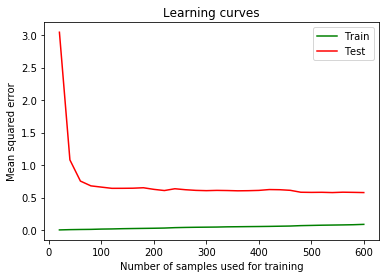

In [14]:
#Dictionaries used to store the mean squared error for each case(20->600 samples)
valuesErrorsTest = {}
valuesErrorsTrain = {}

#For each case 
for indexDataSet in range(20, 620, 20):
    #Calculate the train/test data sets
    X_train = X[:indexDataSet]
    Xtilda_train = np.insert(X_train, 0, np.ones(indexDataSet), axis = 1)
    X_test = X[indexDataSet:]
    Xtilda_test = np.insert(X_test, 0, np.ones(N - indexDataSet), axis = 1)
    
    Y_train = y[:indexDataSet]
    Y_test = y[indexDataSet:]
    
    #Calculate the weights vector
    w = np.dot(np.linalg.pinv(Xtilda_train), np.transpose(Y_train))
    w = np.transpose(w)
    
    #Set the variables to 0
    errorsNumber = 0
    meanSquaredError = 0
    
    #For each sample in our training set calculate the mean squared error
    for indexSample in range(0, indexDataSet):
        predictedValue = np.dot(Xtilda_train[indexSample,:], w)
        meanSquaredError = meanSquaredError + (predictedValue - Y_train[indexSample])**2
    meanSquaredError = meanSquaredError / N_train
    
    #Store the error into the dictionary
    valuesErrorsTrain[indexDataSet] = meanSquaredError
    
    meanSquaredError = 0
    
    #For each sample in our test set calculate the mean squared error
    for indexSample in range(0, N_test):
        predictedValue = np.dot(Xtilda_test[indexSample,:], w)
        meanSquaredError = meanSquaredError + (predictedValue - Y_test[indexSample])**2
    meanSquaredError = meanSquaredError / N_test
    
    #Store the error into the dictionary
    valuesErrorsTest[indexDataSet] = meanSquaredError
    
t = np.arange(20, 620, 20)
plt.plot(t, list(valuesErrorsTrain.values()), 'g', label='Train')
plt.plot(t, list(valuesErrorsTest.values()), 'r', label='Test')
plt.xlabel('Number of samples used for training')
plt.ylabel('Mean squared error')
plt.title('Learning curves')
plt.legend(loc='upper right')
plt.show()